https://betfair-datascientists.github.io/api/apiPythontutorial/#get-market-books

In [25]:
import betfairlightweight
from betfairlightweight import filters
import json
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt

# Save in folder certs/credentials.json with following data:
# {
#     "username" : "your_betfair_username",
#     "password" : "your_betfair_password",
#     "app_key" : "your_betfair_app_key"
# }
# follow the link above to get your app_key
# Create the .PEM file following the instructions using XCA, but when exporting select crt + Key to export one .pem file
# place this .pem file in C://certs/ (this is default location to look for key)

path_creds = 'certs/credentials.json'
path_data = 'data/'

with open(path_creds) as f:
    cred = json.load(f)
    my_username = cred['username']
    my_password = cred['password']
    my_app_key = cred['app_key']

# If you can't get the .pem key setup you can use this less secure way to login
# trading = betfairlightweight.APIClient(
#     my_username, my_password, app_key=my_app_key
# )
# trading.login_interactive()

trading = betfairlightweight.APIClient(username=my_username,
                                       password=my_password,
                                       app_key=my_app_key)

trading.login()



<LoginResource>

In [26]:
# get ids for different sports
results = trading.betting.list_event_types()
dict_event_ids = {}
for i in results:
    dict_event_ids[i.event_type.name] = i.event_type.id


In [34]:
# get data on basketball games 'bb'
bb_filter = filters.market_filter(event_type_ids=[dict_event_ids['Baseball']])
results = trading.betting.list_events(
    filter=bb_filter
)

for i in results:
    print(i.event.id, i.event.name, i.market_count) # event: single game, market_count: number of betting options within the game
    print(type(i))

32443215 Washington Nationals @ San Diego Padres 3
<class 'betfairlightweight.resources.bettingresources.EventResult'>
32443214 Pittsburgh Pirates @ Miami Marlins 3
<class 'betfairlightweight.resources.bettingresources.EventResult'>
32443213 New York Mets @ Philadelphia Phillies 3
<class 'betfairlightweight.resources.bettingresources.EventResult'>
32443212 Arizona Diamondbacks @ San Francisco Giants 3
<class 'betfairlightweight.resources.bettingresources.EventResult'>
32443211 Atlanta Braves @ Cincinnati Reds 3
<class 'betfairlightweight.resources.bettingresources.EventResult'>
32443224 Los Angeles Angels @ Colorado Rockies 3
<class 'betfairlightweight.resources.bettingresources.EventResult'>
32443223 Milwaukee Brewers @ Cleveland Guardians 3
<class 'betfairlightweight.resources.bettingresources.EventResult'>
32443222 Houston Astros @ Los Angeles Dodgers 3
<class 'betfairlightweight.resources.bettingresources.EventResult'>
32443221 Minnesota Twins @ Detroit Tigers 3
<class 'betfairligh

In [33]:
# refine filter for a single game
event_ids = [results[0].event.id, results[1].event.id]
print(f'From now on investigating game {event_ids[0]}, {results[0].event.name}')
bb_filter = filters.market_filter(event_ids=event_ids)
results = trading.betting.list_events(
    filter=bb_filter
)

# check we have the selected game
for i in results:
    print(i.event.id, i.event.name, i.market_count)

From now on investigating game 32443215, Washington Nationals @ San Diego Padres
32443215 Washington Nationals @ San Diego Padres 3
32443214 Pittsburgh Pirates @ Miami Marlins 3


In [29]:
# racing_filter = filters.market_filter(
#     event_type_ids=[7],  # filter on just horse racing
#     market_countries=["GB"],  # filter on just GB countries
#     market_type_codes=["WIN"],  # filter on just WIN market types
# )

# Get market catelogue which contains details about different betting options called a market (but no odds)
results = trading.betting.list_market_catalogue(
    market_projection=[
        "RUNNER_DESCRIPTION", 
        "RUNNER_METADATA", 
        "COMPETITION", 
        "EVENT", 
        "EVENT_TYPE", 
        "MARKET_DESCRIPTION", 
        "MARKET_START_TIME",
    ],
    filter=bb_filter,
    max_results=100,
)

for i in results:
    print(
        "{0} {1} {2} {3} {4:d}:{5:02d} ({6}) {7}".format(
            i.event_type.name,
            i.event.name,
            i.market_id,
            i.market_name,
            i.market_start_time.hour, 
            i.market_start_time.minute,
            i.description.market_type,
            i.runners[0].runner_name
        )
    )

Baseball Washington Nationals @ San Diego Padres 1.215506573 Handicap 20:11 (HANDICAP) Washington Nationals
Baseball Washington Nationals @ San Diego Padres 1.215506572 Moneyline 20:11 (MATCH_ODDS) Washington Nationals
Baseball Washington Nationals @ San Diego Padres 1.215506596 Total Runs 20:11 (COMBINED_TOTAL) Under


In [25]:
# get betting odds details from a single market (aka. a single betting option) - this includes odds
market_ids = [results[0].market_id]
market_names = [results[0].market_name]
market_books = trading.betting.list_market_book(
    market_ids=market_ids,
    price_projection=filters.price_projection(
        price_data=filters.price_data(ex_all_offers=True)
    )
)

print(f'investigating market {market_ids[0]}, {market_names[0]}')

investigating market 1.212369363, Winner


In [26]:
# extract and print the betting odds for the single market
for market_book in market_books:
    print(  # prints market id, inplay?, status and total matched
        market_book.market_id,
        market_book.inplay,
        market_book.status,
        market_book.total_matched,
    )
    for runner in market_book.runners:  
        print (  # prints selection id, status, LPT and total matched
            runner.selection_id, 
            runner.status, 
            runner.last_price_traded, 
            runner.total_matched
        )

1.212369363 False OPEN 3.96
332194 ACTIVE 1.1 0.0
29829 ACTIVE None None
29835 ACTIVE None None
332212 ACTIVE None None
332189 ACTIVE None None
697628 ACTIVE None None
352167 ACTIVE None None
292295 ACTIVE None None
29834 ACTIVE None None
697690 ACTIVE None None
332652 ACTIVE None None
701627 ACTIVE None None
13123 ACTIVE None None
29837 ACTIVE None None
29840 ACTIVE None None
5132858 ACTIVE None None
13109 ACTIVE None None
366629 ACTIVE None None
332193 ACTIVE None None
711186 ACTIVE None None
29830 ACTIVE None None
356182 ACTIVE None None
705559 ACTIVE None None
29832 ACTIVE None None
284245 ACTIVE None None
708779 ACTIVE None None
332209 ACTIVE None None
697643 ACTIVE None None
284244 ACTIVE None None
675919 ACTIVE None None
701622 ACTIVE None None
352166 ACTIVE None None
332651 ACTIVE None None
4548275 ACTIVE None None
29831 ACTIVE None None
701620 ACTIVE None None
697689 ACTIVE None None
351829 ACTIVE None None
332649 ACTIVE None None
701629 ACTIVE None None
332191 ACTIVE None Non

In [27]:
# example of extracting a single odd from the market
market_book = market_books[0]
runner = market_book.runners[0]

runner.last_price_traded

1.1

In [28]:
# function to bring it all together
def get_market_price(market_ids):
    """Given a list of market_ids return details on the markets and runners

    Args:
        market_ids (list): List of market_ids (float) to get details on

    Returns:
        results_markets (DataFrame): details on the markets, eg. market_id, inplay, status, total_matched
        results_runners (DataFrame): details on runners within each market, id, status, last_price_traded, total_matched
    """
    market_books = trading.betting.list_market_book(
        market_ids=market_ids,
        price_projection=filters.price_projection(
            price_data=filters.price_data(ex_all_offers=True)
        )
    )
    results_markets = []
    results_runners = []
    for market_book in market_books:
        results_markets.append({'market_id':market_book.market_id,
                               'inplay':market_book.inplay,
                               'status':market_book.status,
                               'total_matched':market_book.total_matched
        })
        for runner in market_book.runners:
            results_runners.append({'market_id':market_book.market_id,
                                    'selection_id':runner.selection_id,
                                    'status':runner.status,
                                    'last_price_traded':runner.last_price_traded,
                                    'total_matched':runner.total_matched
            })
    results_markets, results_runners = pd.DataFrame(results_markets), pd.DataFrame(results_runners)
    
    current_time = datetime.datetime.now().time().strftime("%H:%M:%S")
    results_markets['date'] = current_time
    results_runners['date'] = current_time
    return results_markets, results_runners
    

In [29]:
# print the details on the market using function
results_market, results_runners = get_market_price(market_ids)
results_market

,market_id,inplay,status,total_matched,date
0,1.212369363,False,OPEN,3.96,11:35:45


In [ ]:
# Bring it all together to create a regular check of the markets and save results

total_mins = 2  # how long to continually check the market
refresh_rate = 30  # seconds between data collection
market_ids = market_ids  # what markets to investigate
is_print_update = True   # print update for each refresh

nb_loops = int(total_mins * 60 / refresh_rate)  # number of times we request and update from API

# check dataframes exist, if they don't create new ones
# we do this to ensure we don't overwrite previously recorded data if already run this jupyter cell
try:
    data_markets
except NameError:
    data_markets = pd.DataFrame(columns=['market_id', 'inplay', 'status', 'total_matched', 'date'])
    data_runners = pd.DataFrame(columns=['market_id', 'selection_id', 'status', 'last_price_traded', 'total_matched', 'date'])

# run the loop for total_mins and keep adding to DataFrame
for loop in np.arange(nb_loops):
    results_markets, results_runners = get_market_price(market_ids=market_ids)
    
    data_markets = pd.concat([data_markets, results_markets])
    data_runners = pd.concat([data_runners, results_runners])
    
    if is_print_update:
        print(f'collected data')
        print(data_runners)
    
    time.sleep(refresh_rate)
    

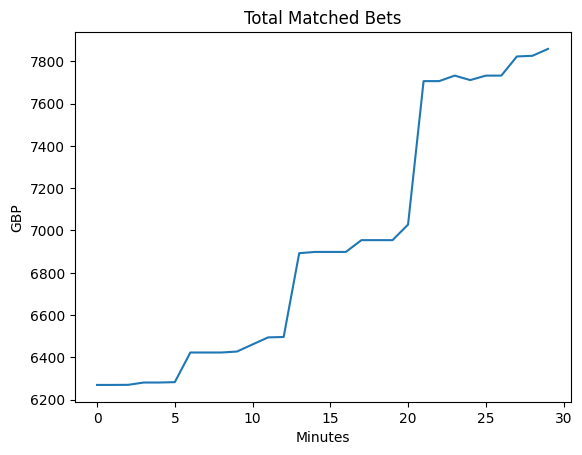

In [37]:
# visualise results
plt.plot(data_markets['total_matched'].reset_index(drop=True))
plt.title('Total Matched Bets')
plt.xlabel('Minutes')
plt.ylabel('GBP')
plt.show()

Text(0.5, 1.0, 'Winning Odds')

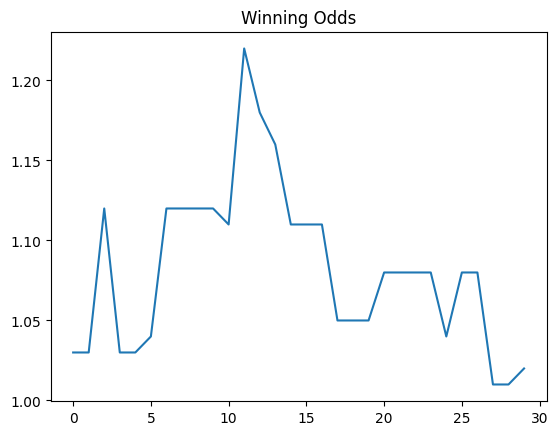

In [33]:
# visualise results
plt.plot(data_runners[data_runners['selection_id']==8876198]['last_price_traded'].reset_index(drop=True))
plt.title('Winning Odds')

In [21]:
data_markets['total_matched']

0    6270.11
0    6270.11
0    6270.55
0    6281.46
0    6281.46
0    6283.17
0    6423.30
0    6423.30
0    6423.30
0    6427.88
0    6461.57
0    6494.74
0    6496.65
0    6892.61
0    6898.61
0    6898.61
0    6898.61
0    6954.29
0    6954.29
0    6954.29
0    7027.81
0    7705.84
0    7705.84
0    7731.96
0    7710.76
0    7731.76
0    7731.96
0    7822.42
0    7825.54
0    7858.02
Name: total_matched, dtype: float64